In [2]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup

In [3]:
raw_html = simple_get('https://realpython.com/blog/')
len(raw_html)

NameError: name 'simple_get' is not defined

In [7]:
raw_html = open('contrived.html').read()
html = BeautifulSoup(raw_html, 'html.parser')
for p in html.select('p'):
    if p['id'] == 'eggman':
        print(p.text) 
        

 I am the egg man 


In [3]:
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)

In [5]:
def get_names():
    """
    Downloads the page where the list of mathematicians is found
    and returns a list of strings, one per mathematician
    """
    url = 'http://www.fabpedigree.com/james/mathmen.htm'
    response = simple_get(url)

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        names = set()
        for li in html.select('li'):
            for name in li.text.split('\n'):
                if len(name) > 0:
                    names.add(name.strip())
        return list(names)

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))

In [12]:
list_of_names = get_names()

In [13]:
list_of_names

['Arthur Cayley',
 'M. E. Camille Jordan',
 'Peter G. L. Dirichlet',
 'Euclid  of Alexandria',
 'George D. Birkhoff',
 'Hermann K. H. Weyl',
 'Apollonius  of Perga',
 'Adrien M. Legendre',
 'John E. Littlewood',
 'Georg Cantor',
 'John F. Nash, Jr.',
 'Kurt Gödel',
 'Carl G. J. Jacobi',
 'F. L. Gottlob Frege',
 'Alhazen ibn al-Haytham',
 'Emmy Noether',
 'John Wallis',
 "Jean le Rond d'Alembert",
 'Bháscara (II) Áchárya',
 'Joseph Liouville',
 'Liu Hui',
 'Albert Einstein',
 'Johannes Kepler',
 'George Pólya',
 'Pythagoras  of Samos',
 'Bernhard Riemann',
 'Galileo Galilei',
 'François Viète',
 'Jean-Victor Poncelet',
 'Ernst E. Kummer',
 'Isaac Newton',
 'Carl Ludwig Siegel',
 'Carl F. Gauss',
 'Felix Hausdorff',
 'Jacob Bernoulli',
 'Omar al-Khayyám',
 'Godfrey H. Hardy',
 'Niels Abel',
 'Marius Sophus Lie',
 'Hermann G. Grassmann',
 'Julius Plücker',
 'F. Gotthold Eisenstein',
 'Hipparchus  of Nicaea',
 'Andrey N. Kolmogorov',
 'Brahmagupta',
 'Alan M. Turing',
 'Leonhard Euler',
 '

In [7]:
def get_hits_on_name(name):
    """
    Accepts a `name` of a mathematician and returns the number
    of hits that mathematician's Wikipedia page received in the 
    last 60 days, as an `int`
    """
    # url_root is a template string that is used to build a URL.
    url_root = 'https://en.wikipedia.org/wiki/'
    response = simple_get(url_root.format(name))

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')

        hit_link = [a for a in html.select('a')
                    if a['href'].find('latest-60') > -1]

        if len(hit_link) > 0:
            # Strip commas
            link_text = hit_link[0].text.replace(',', '')
            try:
                # Convert to integer
                return int(link_text)
            except:
                log_error("couldn't parse {} as an `int`".format(link_text))

    log_error('No pageviews found for {}'.format(name))
    return None

In [14]:
get_hits_on_name(list_of_names[0])

KeyError: 'href'

In [15]:
raw_html = simple_get('http://quotes.toscrape.com/')
html = BeautifulSoup(raw_html, 'html.parser')
for i, body in enumerate(html.select('body')):
        print(i, body.text)

0 




Quotes to Scrape




Login






“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
by Albert Einstein
(about)


            Tags:
            
change
deep-thoughts
thinking
world



“It is our choices, Harry, that show what we truly are, far more than our abilities.”
by J.K. Rowling
(about)


            Tags:
            
abilities
choices



“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
by Albert Einstein
(about)


            Tags:
            
inspirational
life
live
miracle
miracles



“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
by Jane Austen
(about)


            Tags:
            
aliteracy
books
classic
humor



“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
by Marilyn Monroe
(about)


           

In [16]:
raw_html = simple_get('http://www.fabpedigree.com/james/mathmen.htm')
html = BeautifulSoup(raw_html, 'html.parser')
for i, li in enumerate(html.select('li')):
        print(i, li.text)

0  Isaac Newton
 Archimedes
 Carl F. Gauss
 Leonhard Euler
 Bernhard Riemann

1  Archimedes
 Carl F. Gauss
 Leonhard Euler
 Bernhard Riemann

2  Carl F. Gauss
 Leonhard Euler
 Bernhard Riemann

3  Leonhard Euler
 Bernhard Riemann

4  Bernhard Riemann

5  Henri Poincaré
 Joseph-Louis Lagrange
 Euclid  of Alexandria
 David Hilbert
 Gottfried W. Leibniz

6  Joseph-Louis Lagrange
 Euclid  of Alexandria
 David Hilbert
 Gottfried W. Leibniz

7  Euclid  of Alexandria
 David Hilbert
 Gottfried W. Leibniz

8  David Hilbert
 Gottfried W. Leibniz

9  Gottfried W. Leibniz

10  Alexandre Grothendieck
 Pierre de Fermat
 Évariste Galois
 John von Neumann
 René Descartes

11  Pierre de Fermat
 Évariste Galois
 John von Neumann
 René Descartes

12  Évariste Galois
 John von Neumann
 René Descartes

13  John von Neumann
 René Descartes

14  René Descartes

15  Karl W. T. Weierstrass
 Srinivasa Ramanujan
 Hermann K. H. Weyl
 Peter G. L. Dirichlet
 Niels Abel

16  Srinivasa Ramanujan
 Hermann K. H. Weyl
 

In [18]:
import requests # for making standard html requests
from bs4 import BeautifulSoup # magical tool for parsing html data
import json # for parsing data
from pandas import DataFrame as df #

In [19]:
page = requests.get("https://locations.familydollar.com/id/")
soup = BeautifulSoup(page.text, 'html.parser')

In [21]:
dollar_tree_list = soup.find_all(class_ = 'itemlist')
for i in dollar_tree_list[:2]:
  print(i)

<div class="itemlist" data-fl="A"><a class="ga_w2gi_lp" data-gaact="Click_to_CityPage" data-galoc="Aberdeen - ID" dta-linktrack="City index page - Aberdeen" href="https://www.familydollar.com/locations/id/aberdeen/">Aberdeen</a></div>
<div class="itemlist" data-fl="A"><a class="ga_w2gi_lp" data-gaact="Click_to_CityPage" data-galoc="American Falls - ID" dta-linktrack="City index page - American Falls" href="https://www.familydollar.com/locations/id/american-falls/">American Falls</a></div>


In [22]:
type(dollar_tree_list)
len(dollar_tree_list)

48

In [23]:
example = dollar_tree_list[2] # a representative example
example_content = example.contents
print(example_content)

[<a class="ga_w2gi_lp" data-gaact="Click_to_CityPage" data-galoc="Arco - ID" dta-linktrack="City index page - Arco" href="https://www.familydollar.com/locations/id/arco/">Arco</a>]


In [24]:
example_content = example.contents[0]
example_content.attrs

{'class': ['ga_w2gi_lp'],
 'data-galoc': 'Arco - ID',
 'data-gaact': 'Click_to_CityPage',
 'dta-linktrack': 'City index page - Arco',
 'href': 'https://www.familydollar.com/locations/id/arco/'}

In [25]:
example_href = example_content['href']
print(example_href)

https://www.familydollar.com/locations/id/arco/


In [26]:
city_hrefs = [] # initialise empty list

for i in dollar_tree_list:
    cont = i.contents[0]
    href = cont['href']
    city_hrefs.append(href)

#  check to be sure all went well
for i in city_hrefs[:2]:
  print(i)

https://www.familydollar.com/locations/id/aberdeen/
https://www.familydollar.com/locations/id/american-falls/


In [27]:
city_hrefs

['https://www.familydollar.com/locations/id/aberdeen/',
 'https://www.familydollar.com/locations/id/american-falls/',
 'https://www.familydollar.com/locations/id/arco/',
 'https://www.familydollar.com/locations/id/ashton/',
 'https://www.familydollar.com/locations/id/bellevue/',
 'https://www.familydollar.com/locations/id/blackfoot/',
 'https://www.familydollar.com/locations/id/boise/',
 'https://www.familydollar.com/locations/id/buhl/',
 'https://www.familydollar.com/locations/id/burley/',
 'https://www.familydollar.com/locations/id/caldwell/',
 'https://www.familydollar.com/locations/id/cascade/',
 'https://www.familydollar.com/locations/id/challis/',
 'https://www.familydollar.com/locations/id/chubbuck/',
 'https://www.familydollar.com/locations/id/driggs/',
 'https://www.familydollar.com/locations/id/emmett/',
 'https://www.familydollar.com/locations/id/filer/',
 'https://www.familydollar.com/locations/id/franklin/',
 'https://www.familydollar.com/locations/id/glenns-ferry/',
 'htt

In [29]:
page2 = requests.get(city_hrefs[2]) # again establish a representative example
soup2 = BeautifulSoup(page2.text, 'html.parser')

In [30]:
arco = soup2.find_all(type="application/ld+json")
print(arco[1])

<script type="application/ld+json">
	{
	  "@context":"https://schema.org",
	  "@type":"Schema Business Type",
	  "name": "Family Dollar #9143",
	  "address":{
	    "@type":"PostalAddress",
	    "streetAddress":"157 W Grand Avenue",
	    "addressLocality":"Arco",
	    "addressRegion":"ID",
	    "postalCode":"83213",
	    "addressCountry":"US"
	  },
	  "containedIn":"",  
	  "branchOf": {
	    "name":"Family Dollar",
	    "url": "https://www.familydollar.com/"
	  },
	  "url":"https://www.familydollar.com/locations/id/arco/29143/",
	  "telephone":"208-881-5738",
	  "image": "//hosted.where2getit.com/familydollarstore/images/storefront.png"
	}			
	</script>


In [44]:
arco_contents = arco[1].contents[0]
arco_contents

'\n\t{\n\t  "@context":"https://schema.org",\n\t  "@type":"Schema Business Type",\n\t  "name": "Family Dollar #9143",\n\t  "address":{\n\t    "@type":"PostalAddress",\n\t    "streetAddress":"157 W Grand Avenue",\n\t    "addressLocality":"Arco",\n\t    "addressRegion":"ID",\n\t    "postalCode":"83213",\n\t    "addressCountry":"US"\n\t  },\n\t  "containedIn":"",  \n\t  "branchOf": {\n\t    "name":"Family Dollar",\n\t    "url": "https://www.familydollar.com/"\n\t  },\n\t  "url":"https://www.familydollar.com/locations/id/arco/29143/",\n\t  "telephone":"208-881-5738",\n\t  "image": "//hosted.where2getit.com/familydollarstore/images/storefront.png"\n\t}\t\t\t\n\t'

In [32]:
arco_json =  json.loads(arco_contents)

In [33]:
type(arco_json)
print(arco_json)

{'@context': 'https://schema.org', '@type': 'Schema Business Type', 'name': 'Family Dollar #9143', 'address': {'@type': 'PostalAddress', 'streetAddress': '157 W Grand Avenue', 'addressLocality': 'Arco', 'addressRegion': 'ID', 'postalCode': '83213', 'addressCountry': 'US'}, 'containedIn': '', 'branchOf': {'name': 'Family Dollar', 'url': 'https://www.familydollar.com/'}, 'url': 'https://www.familydollar.com/locations/id/arco/29143/', 'telephone': '208-881-5738', 'image': '//hosted.where2getit.com/familydollarstore/images/storefront.png'}


In [34]:
arco_address = arco_json['address']
arco_address

{'@type': 'PostalAddress',
 'streetAddress': '157 W Grand Avenue',
 'addressLocality': 'Arco',
 'addressRegion': 'ID',
 'postalCode': '83213',
 'addressCountry': 'US'}

In [45]:
locs_dict = [] # initialise empty list

for link in city_hrefs:
  locpage = requests.get(link)   # request page info
  locsoup = BeautifulSoup(locpage.text, 'html.parser')
      # parse the page's content
  locinfo = locsoup.find_all(type="application/ld+json")
      # extract specific element
  loccont = locinfo[1].contents[0]  
      # get contents from the bs4 element set
  locjson = json.loads(loccont)  # convert to json
  locaddr = locjson['address'] # get address
  locs_dict.append(locaddr)
locs_dict

[{'@type': 'PostalAddress',
  'streetAddress': '111 N Main Street',
  'addressLocality': 'Aberdeen',
  'addressRegion': 'ID',
  'postalCode': '83210',
  'addressCountry': 'US'},
 {'@type': 'PostalAddress',
  'streetAddress': '253 Harrison St',
  'addressLocality': 'American Falls',
  'addressRegion': 'ID',
  'postalCode': '83211',
  'addressCountry': 'US'},
 {'@type': 'PostalAddress',
  'streetAddress': '157 W Grand Avenue',
  'addressLocality': 'Arco',
  'addressRegion': 'ID',
  'postalCode': '83213',
  'addressCountry': 'US'},
 {'@type': 'PostalAddress',
  'streetAddress': '177 Main Street',
  'addressLocality': 'Ashton',
  'addressRegion': 'ID',
  'postalCode': '83420',
  'addressCountry': 'US'},
 {'@type': 'PostalAddress',
  'streetAddress': '747 N. Main St.',
  'addressLocality': 'Bellevue',
  'addressRegion': 'ID',
  'postalCode': '83313',
  'addressCountry': 'US'},
 {'@type': 'PostalAddress',
  'streetAddress': '67 Sw Main St',
  'addressLocality': 'Blackfoot',
  'addressRegion'

In [46]:
locs_df = df.from_records(locs_dict)
locs_df.drop(['@type', 'addressCountry'], axis = 1, inplace = True)
locs_df.head(n = 5)

,streetAddress,addressLocality,addressRegion,postalCode
0,111 N Main Street,Aberdeen,ID,83210
1,253 Harrison St,American Falls,ID,83211
2,157 W Grand Avenue,Arco,ID,83213
3,177 Main Street,Ashton,ID,83420
4,747 N. Main St.,Bellevue,ID,83313


In [47]:
df.to_csv(locs_df, "family_dollar_ID_locations.csv", sep = ",", index = False)

In [56]:
page = requests.get("https://www.familydollar.com/locations/")
soup = BeautifulSoup(page.text, 'html.parser')

# find all state links
state_list = soup.find_all(class_ = 'itemlist')

state_links = []

for i in state_list:
    cont = i.contents[0]
    attr = cont.attrs
    hrefs = attr['href']
    state_links.append(hrefs)

In [58]:
# find all city links
city_links = []

for link in state_links:
    page = requests.get(link)
    soup = BeautifulSoup(page.text, 'html.parser')
    familydollar_list = soup.find_all(class_ = 'itemlist')
    for store in familydollar_list:
        cont = store.contents[0]
        attr = cont.attrs
        city_hrefs = attr['href']
        city_links.append(city_hrefs)
        

In [62]:
# to get individual store links
store_links = []

for link in city_links:
    locpage = requests.get(link)
    locsoup = BeautifulSoup(locpage.text, 'html.parser')
    locinfo = locsoup.find_all(type="application/ld+json")
    for i in locinfo:
        loccont = i.contents[0]
        locjson = json.loads(loccont)
        try:
            store_url = locjson['url']
            store_links.append(store_url)
        except:
            pass

In [63]:
store_links

['https://www.familydollar.com/locations/al/abbeville/21428/',
 'https://www.familydollar.com/locations/al/albertville/22721/',
 'https://www.familydollar.com/locations/al/aliceville/20567/',
 'https://www.familydollar.com/locations/al/anniston/20552/',
 'https://www.familydollar.com/locations/al/athens/20489/',
 'https://www.familydollar.com/locations/al/atmore/21089/',
 'https://www.familydollar.com/locations/al/auburn/30083/',
 'https://www.familydollar.com/locations/al/bessemer/30109/',
 'https://www.familydollar.com/locations/al/bessemer/30696/',
 'https://www.familydollar.com/locations/al/bessemer/32100/',
 'https://www.familydollar.com/locations/al/bessemer/21634/',
 'https://www.familydollar.com/locations/al/birmingham/30298/',
 'https://www.familydollar.com/locations/al/birmingham/30302/',
 'https://www.familydollar.com/locations/al/birmingham/32312/',
 'https://www.familydollar.com/locations/al/birmingham/22082/',
 'https://www.familydollar.com/locations/al/birmingham/22618/'

In [64]:
# get address and geolocation information
stores = []

for store in store_links:
    storepage = requests.get(store)
    storesoup = BeautifulSoup(storepage.text, 'html.parser')
    storeinfo = storesoup.find_all(type="application/ld+json")
    for i in storeinfo:
        storecont = i.contents[0]
        storejson = json.loads(storecont)
        try:
            store_addr = storejson['address']
            store_addr.update(storejson['geo'])
            stores.append(store_addr)
        except:
            pass

In [65]:
stores_df = df.from_records(stores)

In [68]:
stores_df.head()

,streetAddress,addressLocality,addressRegion,postalCode,latitude,longitude
0,214 Kirkland Street,Abbeville,AL,36310-2417,31.567633,-85.251211
1,315 Sand Mountain Dr Se,Albertville,AL,35950-2329,34.265782,-86.206143
2,35 Memorial Pky E,Aliceville,AL,35442-2155,33.127951,-88.151062
3,1722 Quintard Ave,Anniston,AL,36201-3851,33.667060,-85.828000
4,"515 S Jefferson Sreet, Suite B",Athens,AL,35611-3541,34.798594,-86.971662


In [67]:
stores_df.drop(['@type', 'addressCountry'], axis = 1, inplace = True)

In [88]:
stores_geodf = geo.GeoDataFrame(stores_df, geometry=geo.points_from_xy(stores_df.longitude, stores_df.latitude))

In [83]:
import geopandas as geo
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
usa_state_counties = geo.read_file(r'C:/Users/douge/Python Notebooks/cb_2018_us_county_500k/cb_2018_us_county_500k.shp')

In [80]:
usa_state_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [74]:
statefips = pd.read_csv(r'C:/Users/douge/Python Notebooks/Iowa Counties Data/statefips.csv',dtype={'Name':'string','Postal Code':'string','FIPS':'int64'})
statefips.rename(columns={'FIPS':'STATEFP'},inplace=True)
usa_state_counties['STATEFP'] = usa_state_counties['STATEFP'].astype('int64')

In [81]:
usa_states = usa_state_counties.dissolve(by='STATEFP')

(24, 50)

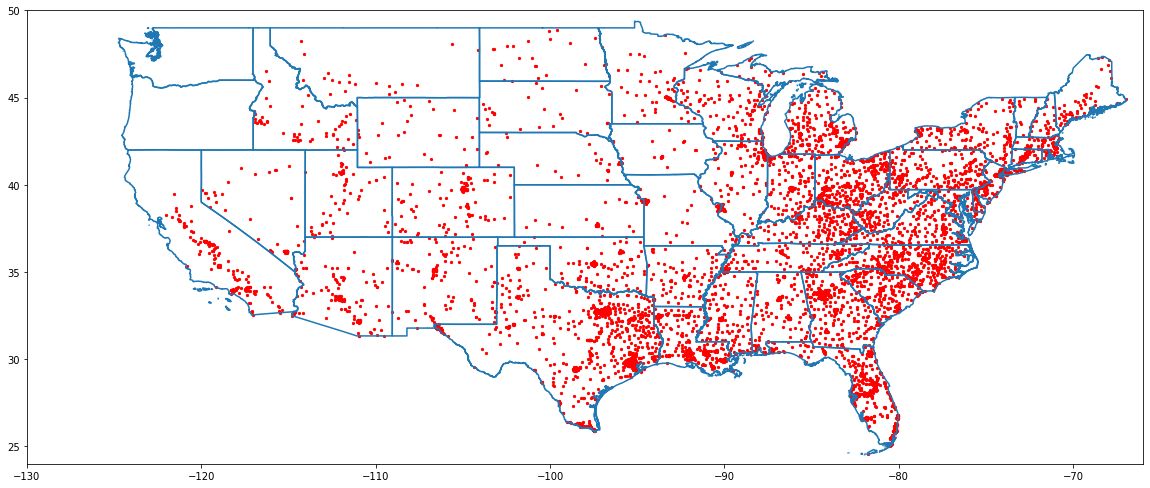

In [101]:
fig, ax = plt.subplots(1,1,sharex=True, sharey=True,figsize=(20,10))
usa_states.boundary.plot(ax=ax)
stores_geodf.plot(ax=ax,marker='o', color='red', markersize=5)
plt.xlim(-130,-66)
plt.ylim(24,50)